In [1]:
from pygmo import hypervolume
import pygmo as pg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
'hypervolume' in dir()

True

In [9]:
udp = pg.problem(pg.dtlz(prob_id = 2, dim = 10, fdim = 2))

In [10]:
pop = pg.population(udp, 50)

In [11]:
hv = hypervolume(pop)
hv

In [39]:
ref_point = [2,2,2,2,2]
hv = hypervolume([[1, 0, 0, 0, 1], [0, 1, 0, 0, 2],[0, 0, 1, 0, 0]] )
hv.compute(ref_point)

20.0

120.0

In [21]:
def read_solutions(file):

    points = []
    with open(file) as file:
        for line in file:
            point = []
            splitted_line = line.replace('\n','').replace('[','').replace(']','').split(',')
            try:
                x = float(splitted_line[0])
                y = float(splitted_line[1])
                z = float(splitted_line[2])
                w = float(splitted_line[3])
                t = float(splitted_line[4])
                point.append(x)
                point.append(y)
                point.append(z)
                point.append(w)
                point.append(t)
                points.append(point)
            except:
                pass

            
            
    return points

In [36]:
evaluations = 200000
executions = 30
step = 5000
problem = 'AggDTLZ5_5'
ref_point = [3,3,3,3,3]
path = '/home/renansantos/NetBeansProjects/PhD_MOEAD/Results/'
file_path = path + 'AggDTLZ5-5' + '/'

df1 = pd.DataFrame(data=None)

for i in range(executions):
    print('execution ',i)
    exec_hv = []
    for j in np.arange(step,evaluations,step):
        name = problem + '-' + str(i) + '-' + str(j) + '-solutions.csv'
        solutions = read_solutions(file_path + name)
        hv = hypervolume(solutions)
        exec_hv.append(hv.compute(ref_point))
    df1[i] = exec_hv

execution  0
execution  1
execution  2
execution  3
execution  4
execution  5
execution  6
execution  7
execution  8
execution  9
execution  10
execution  11
execution  12
execution  13
execution  14
execution  15
execution  16
execution  17
execution  18
execution  19
execution  20
execution  21
execution  22
execution  23
execution  24
execution  25
execution  26
execution  27
execution  28
execution  29


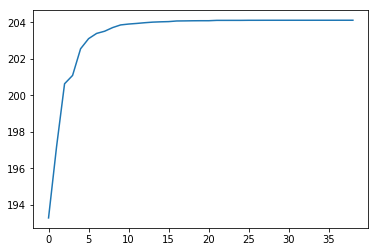

In [37]:
df1.mean(axis=1).plot()

In [49]:
evaluations = 200000
executions = 30
step = 5000
problem = 'DTLZ5_5'
ref_point = [3,3,3,3,3]
path = '/home/renansantos/NetBeansProjects/PhD_MOEAD/Results/'
file_path = path + 'DTLZ5-5' + '/'

df2 = pd.DataFrame(data=None)

for i in range(executions):
    print('execution ',i)
    exec_hv = []
    for j in np.arange(step,evaluations,step):
        name = problem + '-' + str(i) + '-' + str(j) + '-solutions.csv'
        solutions = read_solutions(file_path + name)
        hv = hypervolume(solutions)
        exec_hv.append(hv.compute(ref_point))
    df2[i] = exec_hv

execution  0
execution  1
execution  2
execution  3
execution  4
execution  5
execution  6
execution  7
execution  8
execution  9
execution  10
execution  11
execution  12
execution  13
execution  14
execution  15
execution  16
execution  17
execution  18
execution  19
execution  20
execution  21
execution  22
execution  23
execution  24
execution  25
execution  26
execution  27
execution  28
execution  29


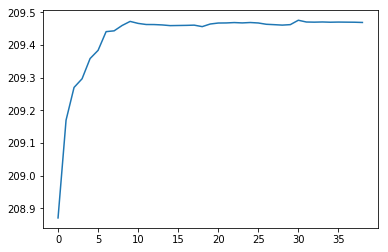

In [50]:
df2.mean(axis=1).plot()

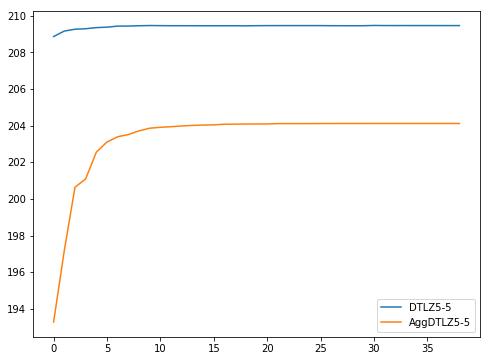

In [51]:
plt.figure(figsize=(8,6))
plt.plot(df2.mean(axis=1), label='DTLZ5-5')
plt.plot(df1.mean(axis=1), label='AggDTLZ5-5')
plt.legend()
plt.show()

### First implementation of Wilcoxon Test

In [75]:
last_hv = df1.shape[0] - 1
ndf1 = df1.loc[last_hv].values
ndf2 = df2.loc[last_hv].values
diff = ndf2 - ndf1
rank = [i + 1 for i in range(len(diff))]

In [79]:
wilcoxon = pd.DataFrame(data = [sorted(diff), rank]).T
wilcoxon.columns = 'Diff Rank'.split()

In [82]:
wilcoxon[wilcoxon['Diff'] > 0]['Rank'].sum()

465.0